# 

# <div style="text-align: center"> Algoritmo de clasificación II </div>

**Dataset: Metales** 


**CoderHouse**

**Alumnos: María Sol Cimbaro Canella y Félix Scenna**

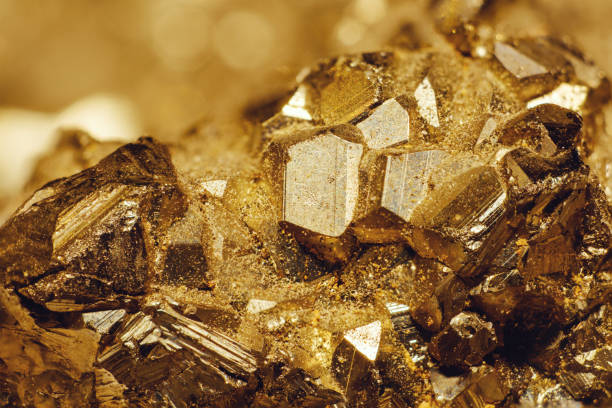

# Resumen

En este proyecto se trabajará con un Dataset provisto por Kaggle. En el siguiente link puede encontrarse el dataset, https://www.kaggle.com/datasets/timmofeyy/-metals-price-changes-within-last-30-years.

El Dataset incluye los valores de 5 metales (aluminio, oro, plata, nickel y uranio) a lo largo de 30 años, con valores tomados mensualmente. Luego incluye un campo con un índice de inflación con el valor acumulado al año de análisis que permite actualizar los precios temporalmente. Con ello, es posible calcular el valor del metal al año 2022. Por eso, las últimas columnas surgen de hacer el cálculo de actualización del precio de cada uno de los 5 metales. Debido a los datos contenidos resulta adecuado para el objetivo planteado.

El objetivo de este trabajo es poder implementar un algoritmo predictivo de machine learning que permita conocer de manera precisa valores futuros de los commodities en estudio, así como también responder a una serie de preguntas: ¿El precio de los metales tiene un comportamiento predecible? ¿Cúal será el valor de los metales en un determinado periodo de tiempo? ¿Existe estacionalidad en los precios? ¿Cómo son esos ciclos, si es que hay? ¿Es posible predecir el valor de una variable mediante el uso de otra? ¿Están los valores de ciertos metales relacionados con otros?. Por supuesto que en la medida que se avance en el trabajo podrán surgir nuevas interrogantes.

El problema específico radica en que los metales forman parte de los commodities, estos son bienes que son altamente vólatiles en cuanto a su valor. Es decir, su precio varía en altos porcentajes en periodos cortos de tiempo. A lo largo del proyecto se continúa profundizando en estos conceptos al momento de realizar cada insight.

# Diccionario de Variables

A continuación se brinda el listado de variables utilizadas en el proyecto:

df: DataFrame, resultado de la lectura del dataset 'Metales', con el que se trabajará a lo largo del proyecto. Tipo de dato: DataFrame.

indice_2005,indice_2007: índice de inflación para ambos años tomados directamente del DataFrame. Tipo de dato: float.

indice_2006: índice de inflación estimado para el año 2006. Tipo de dato: float.

precio_anual: se trata de un DataFrame que contiene las columnas correspondientes a los valores inflacionados de los precios de los metales por año. El agrupamiento por año se realiza utilizando la media de todos los valores del año. Tipo de dato: DataFrame.

aluminio_tiempo, oro_tiempo, nickel_tiempo, plata_tiempo, uranio_tiempo: se trata variables creadas con el fin de administrar las características de los gráficos de dispersión en el análisis bivariado. Tipo de dato: AxesSubplot.

tabla_aluminio, table_oro, tabla_nickel, tabla_plata, tabla_uranio: se trata variables creadas con el fin de alamacenar un nuevo DataFrame donde se incluya la variable 'Month' de modo de aportar claridad y facilidad para realizar las visualizaciones. Tipo de dato: DataFrame.

df_arbol: Este DataFrame contiene los valores de los metales inflacionados junto a un número que designa su rango (alto, medio o bajo). Tipo de dato: DataFrame



# Data Adquisition y Análisis del dataset

In [207]:
# importación de librerías a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

In [208]:
# se modifica el display por default de modo de poder observar todos los registros que deseemos visualizar.
pd.options.display.max_rows = None

In [209]:
# creación del DataFrame 'df' mediante la lectura del archivo .csv
df=pd.read_csv('Metales.csv')

In [210]:
# se visualiza la forma del dataframe.
df.shape

(1048575, 13)

In [211]:
# se obtiene la información sobre registros válidos y tipo de datos de las columnas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               360 non-null    float64
 1   Month              360 non-null    object 
 2   Price_alum         360 non-null    float64
 3   Price_gold         361 non-null    object 
 4   Price_nickel       360 non-null    float64
 5   Price_silver       360 non-null    float64
 6   Price_uran         358 non-null    float64
 7   Inflation_rate     347 non-null    float64
 8   Price_alum_infl    359 non-null    float64
 9   Price_gold_infl    359 non-null    float64
 10  Price_nickel_infl  359 non-null    float64
 11  Price_silver_infl  359 non-null    float64
 12  Price_uran_infl    359 non-null    float64
dtypes: float64(11), object(2)
memory usage: 104.0+ MB


# Data Wrangling

Lo anterior nos muestra que existen muchos registros nulos. 

In [212]:
# se hace la suma de los nulos.
df['Year'].isnull().sum()

1048215

In [213]:
# Se toman todos los valores hasta Noviembre 2021 inclusive. A partir de allí no hay datos completos.
df=df[0:358] 
df

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
0,1992.0,Feb,1266.83,353.91,7861.90,4.15,7.90,89.59,2401.782997,670.977969,14905.376210,7.867985,14.977610
1,1992.0,Mar,1280.47,344.34,7417.70,4.11,7.75,89.59,2427.643073,652.834206,14063.217430,7.792149,14.693225
2,1992.0,Apr,1317.05,338.62,7420.60,4.05,7.75,89.59,2496.995095,641.989658,14068.715540,7.678395,14.693225
3,1992.0,May,1306.79,337.24,7326.80,4.07,7.55,89.59,2477.543161,639.373316,13890.880120,7.716313,14.314045
4,1992.0,Jun,1275.55,340.81,7192.80,4.06,7.75,89.59,2418.315245,646.141679,13636.829520,7.697354,14.693225
5,1992.0,Jul,1313.05,352.72,7497.90,3.97,7.75,89.59,2489.411495,668.721848,14215.268610,7.526723,14.693225
6,1992.0,Aug,1305.05,343.06,7268.00,3.81,8.05,89.59,2474.244295,650.407454,13779.401200,7.223379,15.261995
7,1992.0,Sep,1269.61,345.43,6917.50,3.77,8.75,89.59,2407.053599,654.900737,13114.888250,7.147543,16.589125
8,1992.0,Oct,1173.78,344.38,6305.30,3.75,10.25,89.59,2225.369502,652.910042,11954.218270,7.109625,19.432975
9,1992.0,Nov,1159.05,335.02,5564.88,3.77,10.50,89.59,2197.442895,635.164418,10550.455992,7.147543,19.906950


Luego de revisar el DataFrame se observa que a partir del año 2022 ya no hay datos, por lo que es razonable eliminar los registros en blanco. También se elimina el último valor del año 2021 ya que contiene valores NaN que no son de utlidad. Al mismo tiempo no es relevante elimnar un solo registro.


Se observa que el DataFrame se compone de los precios de los metales durante los últimos 30 años, conteniendo realizado registros mensuales de los mismos. 

El DataFrame posee el índice de inflación del dólar estadounidense acumulado, con el que se calculan los valores de los metales actulizados. De esta manera es posible realizar análisis de los precios independientemente del tiempo.

In [214]:
# se visualiza la nueva forma del dataframe a utilizar.
df.shape

(358, 13)

Puede verse que para el año 2006 no hay indice de inflación y se verifica que el calculo del valor inflacionado no está hecho. Por ello, luego de hacerse una breve investigación se ve que existen distintos modelos para calcular el indice de inflación, por ej. el índice de precios del consumidor. Todos ellos arrojan valores distintos. Como no sabemos de qué manera se hizo el cálculo y además el valor del índice es lógicamente creciente a lo largo del tiempo, se toma la media de los años adyacentes.
Con ello se realiza el cálculo de los valores inflacionados.

In [215]:
# se calcula el índice para el año 2006
indice_2005=31.96
indice_2007=28.30
indice_2006=round((indice_2005+indice_2007)/2,2)
indice_2006

30.13

In [216]:
# se muestra como el año 2006 se encuentra incompleto para el índice de inflación. Se ve también que los valores
# inflacionados no están calculados.
df[df.Inflation_rate.isnull()]

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
167,2006.0,Jan,2377.86,549.86,14555.24,9.14,36.75,NaN,2377.86,549.86,14555.24,9.14,36.75
168,2006.0,Feb,2455.33,555.0,14978.75,9.53,37.69,NaN,2455.33,555.00,14978.75,9.53,37.69
169,2006.0,Mar,2429.13,557.09,14897.39,10.38,39.77,NaN,2429.13,557.09,14897.39,10.38,39.77
170,2006.0,Apr,2621.11,610.65,17942.22,12.61,41.10,NaN,2621.11,610.65,17942.22,12.61,41.10
171,2006.0,May,2861.48,675.39,21077.14,13.38,42.28,NaN,2861.48,675.39,21077.14,13.38,42.28
172,2006.0,Jun,2477.34,596.15,20754.55,10.80,44.17,NaN,2477.34,596.15,20754.55,10.80,44.17
173,2006.0,Jul,2512.71,633.71,26586.19,11.23,46.50,NaN,2512.71,633.71,26586.19,11.23,46.50
174,2006.0,Aug,2459.93,632.59,30743.64,12.19,47.44,NaN,2459.93,632.59,30743.64,12.19,47.44
175,2006.0,Sep,2472.88,598.19,30130.71,11.68,52.44,NaN,2472.88,598.19,30130.71,11.68,52.44
176,2006.0,Oct,2654.59,585.78,32702.96,11.56,56.06,NaN,2654.59,585.78,32702.96,11.56,56.06


In [217]:
# se completan los valores nulos con el índice calculado.
df.Inflation_rate=df.Inflation_rate.fillna(indice_2006)

In [218]:
# se visualiza la modificación.
df[df.Inflation_rate==indice_2006]

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
167,2006.0,Jan,2377.86,549.86,14555.24,9.14,36.75,30.13,2377.86,549.86,14555.24,9.14,36.75
168,2006.0,Feb,2455.33,555.0,14978.75,9.53,37.69,30.13,2455.33,555.00,14978.75,9.53,37.69
169,2006.0,Mar,2429.13,557.09,14897.39,10.38,39.77,30.13,2429.13,557.09,14897.39,10.38,39.77
170,2006.0,Apr,2621.11,610.65,17942.22,12.61,41.10,30.13,2621.11,610.65,17942.22,12.61,41.10
171,2006.0,May,2861.48,675.39,21077.14,13.38,42.28,30.13,2861.48,675.39,21077.14,13.38,42.28
172,2006.0,Jun,2477.34,596.15,20754.55,10.80,44.17,30.13,2477.34,596.15,20754.55,10.80,44.17
173,2006.0,Jul,2512.71,633.71,26586.19,11.23,46.50,30.13,2512.71,633.71,26586.19,11.23,46.50
174,2006.0,Aug,2459.93,632.59,30743.64,12.19,47.44,30.13,2459.93,632.59,30743.64,12.19,47.44
175,2006.0,Sep,2472.88,598.19,30130.71,11.68,52.44,30.13,2472.88,598.19,30130.71,11.68,52.44
176,2006.0,Oct,2654.59,585.78,32702.96,11.56,56.06,30.13,2654.59,585.78,32702.96,11.56,56.06


In [219]:
# se crea una función que permite reutilizar código por tratarse de una operación reptitiva para realizar el cálculo 
# de los valores inflacionados.
def inflacionar(precio,indice,precio_infl):
    for i in range(len(df.Year)):
        if df.Inflation_rate[i]==indice:
            df[precio_infl]=df[precio]+df[precio]*indice/100
            

In [220]:
#Se inflacionan todos los precios para el nuevo indice de inflación para el año 2006
inflacionar('Price_alum',indice_2006,'Price_alum_infl')
inflacionar('Price_gold',indice_2006,'Price_gold_infl')
inflacionar('Price_nickel',indice_2006,'Price_nickel_infl')
inflacionar('Price_silver',indice_2006,'Price_silver_infl')
inflacionar('Price_uran',indice_2006,'Price_uran_infl')

In [221]:
# Se visualiza la modificación.
df[df.Inflation_rate==indice_2006]

,Year,Month,Price_alum,Price_gold,Price_nickel,Price_silver,Price_uran,Inflation_rate,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
167,2006.0,Jan,2377.86,549.86,14555.24,9.14,36.75,30.13,3094.309218,715.532818,18940.733812,11.893882,47.822775
168,2006.0,Feb,2455.33,555.0,14978.75,9.53,37.69,30.13,3195.120929,722.2215,19491.847375,12.401389,49.045997
169,2006.0,Mar,2429.13,557.09,14897.39,10.38,39.77,30.13,3161.026869,724.941217,19385.973607,13.507494,51.752701
170,2006.0,Apr,2621.11,610.65,17942.22,12.61,41.10,30.13,3410.850443,794.638845,23348.210886,16.409393,53.483430
171,2006.0,May,2861.48,675.39,21077.14,13.38,42.28,30.13,3723.643924,878.885007,27427.682282,17.411394,55.018964
172,2006.0,Jun,2477.34,596.15,20754.55,10.80,44.17,30.13,3223.762542,775.769995,27007.895915,14.054040,57.478421
173,2006.0,Jul,2512.71,633.71,26586.19,11.23,46.50,30.13,3269.789523,824.646823,34596.609047,14.613599,60.510450
174,2006.0,Aug,2459.93,632.59,30743.64,12.19,47.44,30.13,3201.106909,823.189367,40006.698732,15.862847,61.733672
175,2006.0,Sep,2472.88,598.19,30130.71,11.68,52.44,30.13,3217.958744,778.424647,39209.092923,15.199184,68.240172
176,2006.0,Oct,2654.59,585.78,32702.96,11.56,56.06,30.13,3454.417967,762.275514,42556.361848,15.043028,72.950878


In [222]:
# se totalizan los nulos, mostrando que se ha concluido con la limpieza.
df.isnull().sum()

Year                 0
Month                0
Price_alum           0
Price_gold           0
Price_nickel         0
Price_silver         0
Price_uran           0
Inflation_rate       0
Price_alum_infl      0
Price_gold_infl      0
Price_nickel_infl    0
Price_silver_infl    0
Price_uran_infl      0
dtype: int64

In [223]:
# si se observa detenidamente, uno de los tipos (el precio del oro inflacionado) no es del tipo float como el resto.
# Por ello, se modica para que quede igual al resto y no interfiera en los futuros cálculos.
df.Price_gold_infl=df.Price_gold_infl.apply(float)

# Data Visualization

## Análisis Univariado

En esta sección se propone observar el precio de cada uno de los metales, utilizando el valor inflacionado de los mismos. Este valor permite analizar la variabilidad del precio con independencia del tiempo. Por ello, el análisis univariado es adecuado.

In [224]:
# Se visualizan las medidas principales para el precio del aluminio.
df.Price_alum_infl.describe()

count     358.000000
mean     2339.650162
std       568.256782
min      1353.104753
25%      1908.323917
50%      2260.598840
75%      2649.362216
max      3996.604612
Name: Price_alum_infl, dtype: float64

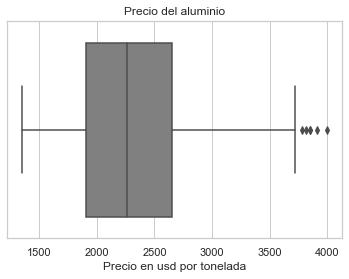

In [225]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
sns.boxplot('Price_alum_infl',data=df,color='grey').set(title='Precio del aluminio',xlabel='Precio en usd por tonelada')
plt.show()


In [226]:
# Se visualizan las medidas principales para el precio del oro.
df.Price_gold_infl.describe()

count     358.000000
mean     1083.809914
std       681.659504
min       333.236904
25%       462.159948
50%       838.434097
75%      1667.036871
max      2561.778219
Name: Price_gold_infl, dtype: float64

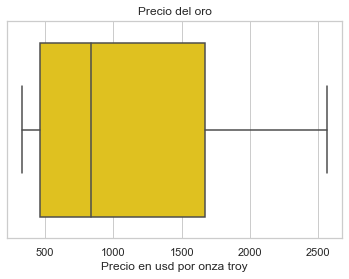

In [227]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
box=sns.boxplot('Price_gold_infl',data=df,color='gold').set(title='Precio del oro',xlabel='Precio en usd por onza troy')
plt.show()

In [228]:
# Se visualizan las medidas principales para el precio del niquel.
df.Price_nickel_infl.describe()

count      358.000000
mean     17088.919210
std       9993.367314
min       5038.542509
25%       9523.999986
50%      14976.791830
75%      21526.322568
max      67900.597765
Name: Price_nickel_infl, dtype: float64

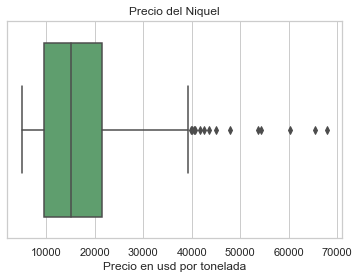

In [229]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
box=sns.boxplot('Price_nickel_infl',data=df,color='g').set(title='Precio del Niquel',xlabel='Precio en usd por tonelada')
plt.show()

In [230]:
# Se visualizan las medidas principales para el precio de la plata.
df.Price_silver_infl.describe()

count    358.000000
mean      16.652096
std       11.332358
min        4.749745
25%        6.600844
50%       15.953938
75%       22.749977
max       55.565510
Name: Price_silver_infl, dtype: float64

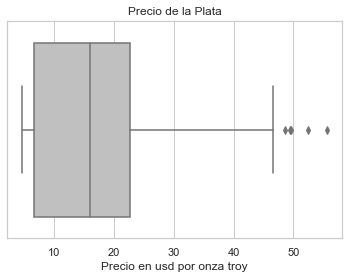

In [231]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
box=sns.boxplot('Price_silver_infl',data=df,color='silver').set(title='Precio de la Plata',xlabel='Precio en usd por onza troy')
plt.show()

In [232]:
# Se visualizan las medidas principales para el precio del uranio.
df.Price_uran_infl.describe()

count    358.000000
mean      36.949723
std       27.829073
min        9.239230
25%       13.653890
50%       31.959928
75%       51.606305
max      177.263086
Name: Price_uran_infl, dtype: float64

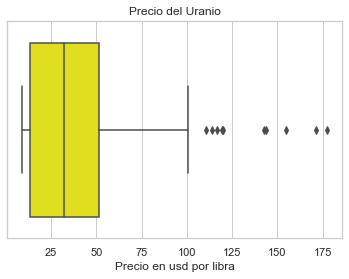

In [233]:
# Se utiliza el gráfico de cajas de modo de comprender mejor las medidas anteriores.
box=sns.boxplot('Price_uran_infl',data=df,color='yellow').set(title='Precio del Uranio',xlabel='Precio en usd por libra')
plt.show()

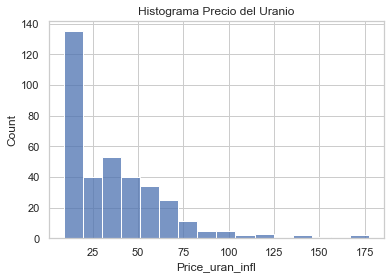

In [234]:
# se utilizar un histograma para visualizar la distribución de frecuencias en el caso del Uranio.
sns.histplot(df['Price_uran_infl']).set(title='Histograma Precio del Uranio')
plt.show()

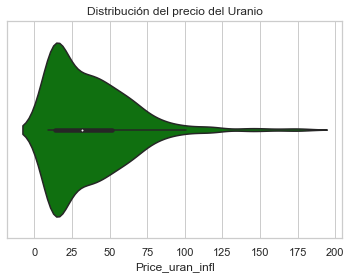

In [235]:
# se utiliza un gráfico de violín en la búsqueda de apreciar las datos de manera distinta que brinde nueva información.
sns.violinplot(x='Price_uran_infl',data=df,color='green').set(title='Distribución del precio del Uranio')
plt.show()

Los gráficos utilizados permiten establecer cotas para los precios de los metales. Es decir, entender en qué rango de valores pueden estar los precios de cada uno de los metales. Para avanzar en el análisis y poder responder otras preguntas es necesario realizar un análisis bivariado. Por ejemplo, incluyendo el tiempo, ya que podría hacer años que el rango se ha modificado. O evaluar tendencias a lo largo de los años, o incluso dentro del año.

## Análisis Bivariado

A continuación trabajaremos con análisis bivariados. Fundamentalmente se quiere observar cómo han evolucionado los precios de los metales a lo largo del tiempo.

Para ello se genera un nuevo DataFrame que contiene el precio de cada metal por año, tomando el promedio del valor a lo largo de los 12 meses de cada año.

In [236]:
# se genera DataFrame agrupando por año y utilizando el promedio del precio de los metales a valor actualizado.
precio_anual=pd.DataFrame(df.groupby(by='Year')['Price_alum_infl','Price_gold_infl','Price_nickel_infl','Price_silver_infl','Price_uran_infl'].mean())
precio_anual

,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
Year,,,,,
1992.0,1641.333239,446.032405,9049.648335,5.115292,11.120200
1993.0,1482.244681,468.168701,6888.326362,5.606434,13.113851
1994.0,1921.737067,499.714382,8250.007766,6.877371,12.259330
1995.0,2349.702105,499.912830,10707.147368,6.766760,15.179664
1996.0,1959.316442,504.508588,9760.812728,6.770013,20.305702
1997.0,2081.208129,430.855008,9014.607185,6.383961,15.743561
1998.0,1766.474627,382.791492,6024.398714,7.224384,13.517254
1999.0,1771.186417,362.761232,7822.410346,6.786280,13.033604
2000.0,2015.896966,363.103908,11240.289978,6.445773,10.781270


El gráfico elegido para visualizar las variables es el de dispersión. Con esto se intenta entender cómo ha variado el precio de los metales a lo largo del tiempo e incluso empezar a notar si existe alguna relación en el comportamiento de los mismos. Al final se coloca una comparativa de los 5 metales.

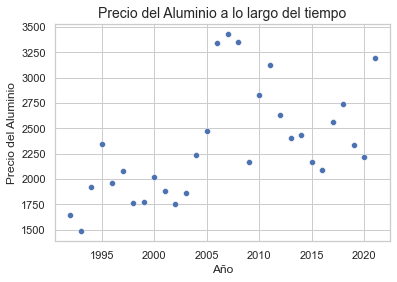

In [237]:
# se realiza el gráfico de dispersión para el aluminio a lo largo del tiempo.
sns.set(style='whitegrid')

aluminio_tiempo = sns.scatterplot(x='Year',y='Price_alum_infl',data=precio_anual)
aluminio_tiempo.set_title('Precio del Aluminio a lo largo del tiempo',size=14)
aluminio_tiempo.set_xlabel('Año')
aluminio_tiempo.set_ylabel('Precio del Aluminio')
plt.show()

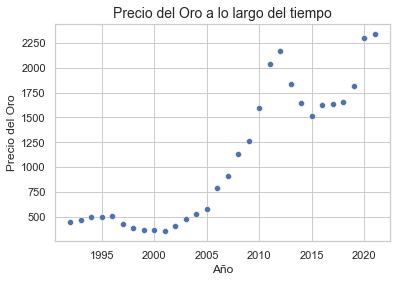

In [238]:
# se realiza el gráfico de dispersión para el oro a lo largo del tiempo.
sns.set(style='whitegrid')

oro_tiempo = sns.scatterplot(x='Year',y='Price_gold_infl',data=precio_anual)
oro_tiempo.set_title('Precio del Oro a lo largo del tiempo',size=14)
oro_tiempo.set_xlabel('Año')
oro_tiempo.set_ylabel('Precio del Oro')
plt.show()

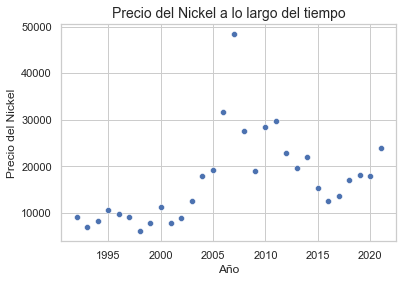

In [239]:
# se realiza el gráfico de dispersión para el nickel a lo largo del tiempo.
sns.set(style='whitegrid')

nickel_tiempo = sns.scatterplot(x='Year',y='Price_nickel_infl',data=precio_anual)
nickel_tiempo.set_title('Precio del Nickel a lo largo del tiempo',size=14)
nickel_tiempo.set_xlabel('Año')
nickel_tiempo.set_ylabel('Precio del Nickel')
plt.show()

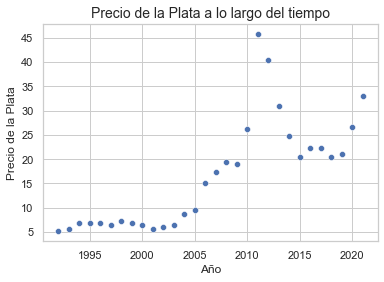

In [240]:
# se realiza el gráfico de dispersión para la plata a lo largo del tiempo.
sns.set(style='whitegrid')

plata_tiempo = sns.scatterplot(x='Year',y='Price_silver_infl',data=precio_anual)
plata_tiempo.set_title('Precio de la Plata a lo largo del tiempo',size=14)
plata_tiempo.set_xlabel('Año')
plata_tiempo.set_ylabel('Precio de la Plata')
plt.show()

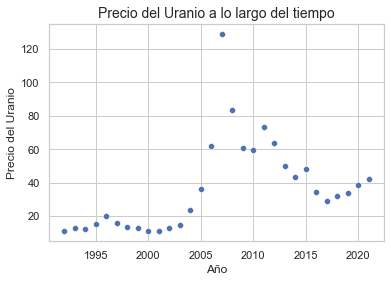

In [241]:
# se realiza el gráfico de dispersión para el uranio a lo largo del tiempo.
sns.set(style='whitegrid')

uranio_tiempo = sns.scatterplot(x='Year',y='Price_uran_infl',data=precio_anual,)
uranio_tiempo.set_title('Precio del Uranio a lo largo del tiempo',size=14)
uranio_tiempo.set_xlabel('Año')
uranio_tiempo.set_ylabel('Precio del Uranio')
plt.show()

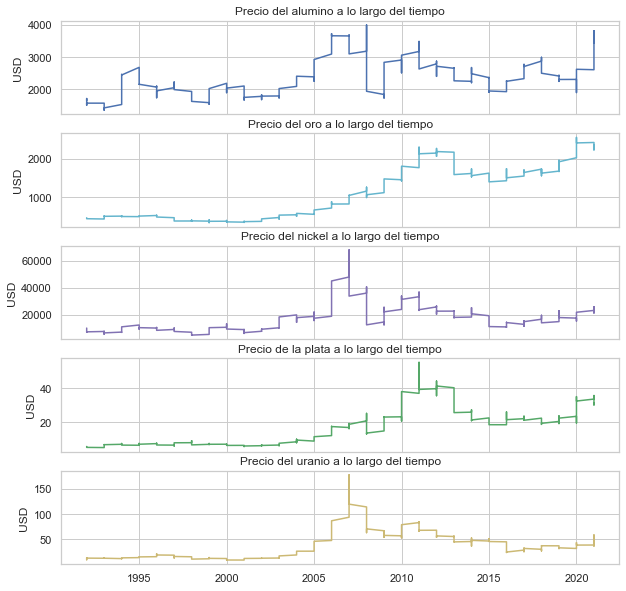

In [242]:
# se realiza comparativa de la variación de precios a lo largo del tiempo de todos los metales.
fig,ax= plt.subplots(5,1,sharex=True)
fig.set_size_inches(10, 10)
ax[0].plot('Year','Price_alum_infl',data=df)
ax[1].plot('Year','Price_gold_infl',data=df,color='c')
ax[2].plot('Year','Price_nickel_infl',data=df,color='m')
ax[3].plot('Year','Price_silver_infl',data=df,color='g')
ax[4].plot('Year','Price_uran_infl',data=df,color='y')
ax[0].set_title('Precio del alumino a lo largo del tiempo')
ax[1].set_title('Precio del oro a lo largo del tiempo')
ax[2].set_title('Precio del nickel a lo largo del tiempo')
ax[3].set_title('Precio de la plata a lo largo del tiempo')
ax[4].set_title('Precio del uranio a lo largo del tiempo')
for i in range(5):
    ax[i].set_ylabel('USD')
plt.show()

El análisis bivariado arroja una primera idea, y es que en general los metales han tenido una tendencia al alza a lo largo del tiempo, más allá de las fluctuaciones. Y puede verse a simple viste que parece haber una relación entre el comportamiento de metales diferentes. Por ejemplo: la gráfica correspondiente al oro es similar a la plata. Pero para poder concluir esto se debe observar la matriz de correlación.

## Análisis Multivariado

En este apartado se comienza generando la matriz de correlación de manera de entender cómo las variables se relacionan entre sí. También servirá para identificar si algunas variables pueden ser utilizadas para predecir los valores de otras.
Una aclaración importante: Los precios de los metales tienen distintos órdenes de magnitud por lo que representarlos en un mismo gráfico distorsiona el análisis en muchos casos. Sin embargo sí se pueden ver las tendencias comunes.

In [243]:
# se utiliza el método corr() para mostrar la relaciones entre todas las variables.
precio_anual.corr()

,Price_alum_infl,Price_gold_infl,Price_nickel_infl,Price_silver_infl,Price_uran_infl
Price_alum_infl,1.000000,0.525979,0.889267,0.622720,0.821355
Price_gold_infl,0.525979,1.000000,0.462522,0.931567,0.484640
Price_nickel_infl,0.889267,0.462522,1.000000,0.578572,0.943556
Price_silver_infl,0.622720,0.931567,0.578572,1.000000,0.608515
Price_uran_infl,0.821355,0.484640,0.943556,0.608515,1.000000


Puede verse que existe una correlación alta de todos los precios de los metales en general. Sin embargo podemos ver dos pares que destacan por sobre el resto.  

Corr(Niquel vs. Uranio) = 0.94

Corr(Oro vs. Plata) = 0.93

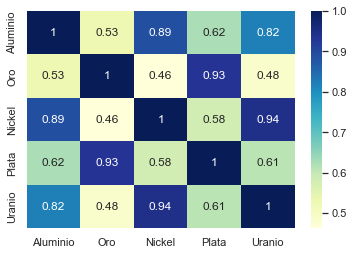

In [244]:
# aquí se muestra gráficamente la relación entre las variables.
sns.heatmap(data=precio_anual.corr(),cmap="YlGnBu",annot=True,xticklabels=['Aluminio','Oro','Nickel','Plata','Uranio'],
            yticklabels=['Aluminio','Oro','Nickel','Plata','Uranio'])
plt.show()

Pueden verse en colores más cercanos al azul, los valores más altos de correlación.

A continuación con la idea de identificar si existe cierta estacionalidad en el valor de los precios durante el año, se incluye la variable 'Month'. Al mismo tiempo se pretende observar con mayor detalle la variación de precios de los commodities en estudio.

In [245]:
# se genera una variable que guarda un nuevo DataFrame que permite aportar claridad y ser utilizado para realizar distintas gráficas.
tabla_aluminio=pd.crosstab(df['Year'],df['Month'],values=df['Price_alum_infl'],aggfunc='mean').reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# como los valores de Enero 1992 y Diciembre 2021 no están disponibles, se utiliza la media del año correspondiente.
tabla_aluminio.iloc[0][0]=tabla_aluminio.iloc[0].mean()
tabla_aluminio.iloc[-1][-1]=tabla_aluminio.iloc[-1].mean()
tabla_aluminio

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1992.0,1641.333239,1648.525879,1666.275611,1713.877165,1700.525827,1659.873215,1708.671965,1698.261565,1652.143493,1527.439914,1508.271765,1570.799230
1993.0,1570.356788,1563.967405,1498.225729,1442.530089,1462.609148,1516.404890,1564.331769,1525.305782,1451.443994,1414.643230,1353.104753,1424.012590
1994.0,1528.493967,1652.559909,1677.414739,1663.998336,1721.086367,1822.574754,1942.086146,1893.859968,2042.025986,2209.672465,2462.827367,2444.244803
1995.0,2681.393715,2493.485995,2348.937591,2406.103700,2293.788497,2316.379065,2420.548130,2457.270816,2291.368079,2178.792616,2152.441291,2155.915762
1996.0,2068.208142,2071.084015,2098.320224,2065.462399,2068.104038,1929.151224,1898.206310,1904.270368,1831.423594,1738.979242,1886.260376,1952.327377
1997.0,2050.341293,2056.067013,2123.162041,2031.901872,2114.937825,2039.852815,2071.656587,2225.977754,2095.873780,2092.308218,2080.765687,1991.652663
1998.0,1933.458527,1907.133228,1870.879010,1845.451608,1775.910136,1701.111412,1703.674973,1705.874170,1746.695951,1696.973278,1685.131448,1625.401778
1999.0,1585.581998,1544.447905,1537.603067,1663.321660,1722.218498,1711.612903,1826.712888,1862.576716,1942.164224,1918.649733,1916.502588,2022.844824
2000.0,2186.548364,2173.522351,2052.215165,1896.176282,1908.733827,1960.161203,2034.582550,1987.904919,2083.654573,1952.262312,1917.934018,2037.068033


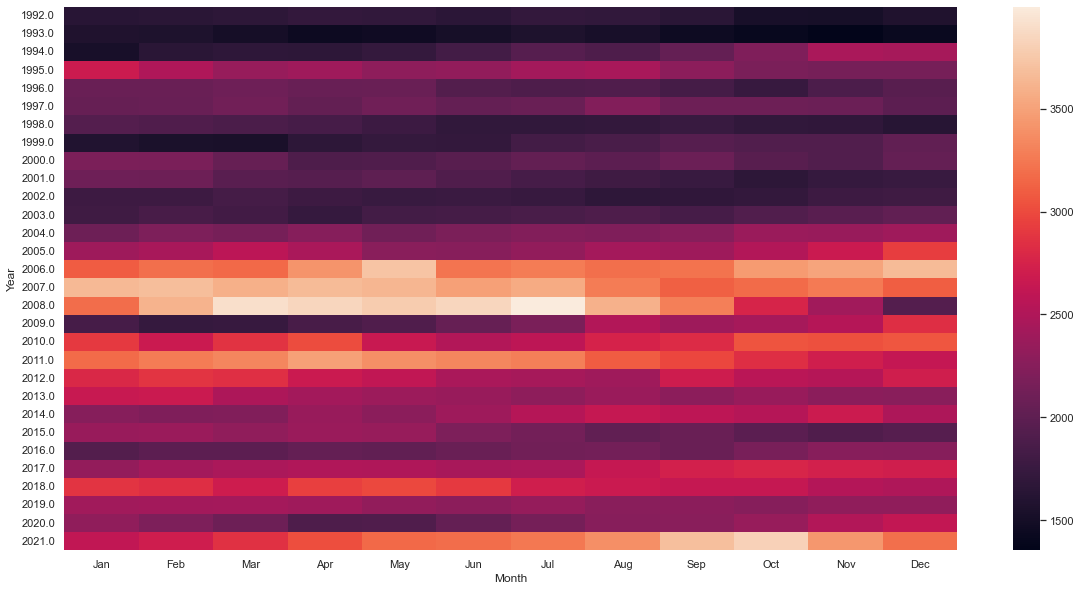

In [246]:
# se genera el heatmap con un tamaño que permite ver el detalle.
plt.figure(figsize=(20,10))
sns.heatmap(tabla_aluminio)
plt.show()

El valor del aluminio no parece tener una variación mensual similar a lo largo de los años. Sí se puede ver que tuvo un aumento drástico en el año 2006 (probablemente a un evento histórico) y luego volvió a bajar estabilizándose en valores más altos a los previos. En el año 2021 parece estar nuevamente cercano a los picos históricos. Otra conclusión posible es que el precio del aluminio es sumamente volátil, con grandes variaciones de un mes a otro. 

In [247]:
# se genera una variable que guarda un nuevo DataFrame que permite aportar claridad y ser utilizado para realizar distintas gráficas.
tabla_oro=pd.crosstab(df['Year'],df['Month'],values=df['Price_gold_infl'],aggfunc='mean').reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# como los valores de Enero 1992 y Diciembre 2021 no están disponibles, se utiliza la media del año correspondiente.
tabla_oro.iloc[0][0]=tabla_oro.iloc[0].mean()
tabla_oro.iloc[-1][-1]=tabla_oro.iloc[-1].mean()
tabla_oro

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1992.0,446.032405,460.543083,448.089642,440.646206,438.850412,443.496053,458.994536,446.423978,449.508059,448.141694,435.961526,435.701266
1993.0,428.140713,428.531103,429.533104,445.239795,477.811334,483.940457,510.356847,492.984492,462.325864,473.907434,486.464979,498.788290
1994.0,503.446944,496.979483,499.868369,490.941451,496.354859,501.833332,501.638137,494.962468,509.563054,507.207701,500.206707,493.570077
1995.0,492.607115,490.121632,497.252756,508.847339,501.286786,504.331828,502.601099,499.269771,498.475978,498.580082,501.403903,504.175672
1996.0,519.804285,526.714188,515.588073,511.215705,510.018509,501.351851,499.009511,504.058555,498.580082,495.886391,491.696205,480.179700
1997.0,462.104643,451.004554,457.810353,448.258811,447.438992,443.430988,421.751330,421.634213,420.085666,422.753331,398.249852,375.737362
1998.0,376.205830,387.123737,385.106722,401.177777,389.218830,380.396016,381.111731,369.712343,376.049674,385.093709,382.738356,379.563184
1999.0,373.577204,373.902529,372.119748,367.773406,359.731372,340.042703,333.236904,334.030697,344.506162,404.339936,381.515134,368.358991
2000.0,369.985616,390.207818,372.679307,363.960597,358.104747,371.820449,366.433067,357.167811,356.139784,351.351000,346.158813,353.237885


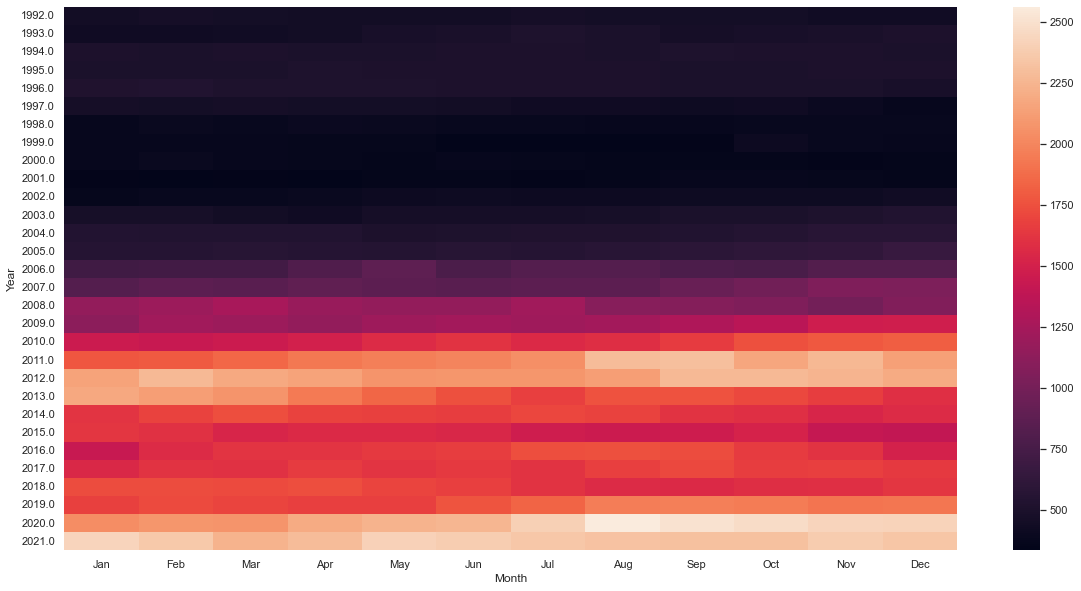

In [248]:
# se genera el heatmap con un tamaño que permite ver el detalle.
plt.figure(figsize=(20,10))
sns.heatmap(tabla_oro)
plt.show()

El gráfico del oro es bastante particular ya que muestra una tendencia en aumento de manera general. No parece tener estacionadlidad a lo largo de los meses del año. Podría decirse que a diferencia del aluminio, un evento histórico importante, no parecería hacer saltar en valor en los mismos niveles. Podría hablarse de una cierta "inercia" en el precio de este metal. Al mismo tiempo una menor volatilidad. Esto no quiere decir que no sea volátil, de un mes a otro puede haber saltos de un 10%

In [249]:
# se genera una variable que guarda un nuevo DataFrame que permite aportar claridad y ser utilizado para realizar distintas gráficas.
tabla_nickel=pd.crosstab(df['Year'],df['Month'],values=df['Price_nickel_infl'],aggfunc='mean').reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# como los valores de Enero 1992 y Diciembre 2021 no están disponibles, se utiliza la media del año correspondiente.
tabla_nickel.iloc[0][0]=tabla_nickel.iloc[0].mean()
tabla_nickel.iloc[-1][-1]=tabla_nickel.iloc[-1].mean()
tabla_nickel

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1992.0,9049.648335,10230.690470,9652.653010,9656.426780,9534.364840,9359.990640,9757.017270,9457.848400,9001.742750,8205.086890,7241.578344,7448.732291
1993.0,7717.919209,7858.134284,7770.452690,7771.793029,7498.806315,7199.351159,6553.607060,6144.491353,5664.415757,5789.353570,6030.081057,6661.510856
1994.0,7258.586335,7580.007435,7271.065802,7037.391361,7920.557645,8174.558392,8102.882788,7624.967350,8282.449175,8781.549777,9832.804982,11133.272150
1995.0,12482.785315,11068.142085,9801.274483,9626.796179,9411.248847,10243.274041,11186.716541,11639.686058,10937.699773,10490.729249,11068.740683,10528.675157
1996.0,10230.885665,10690.895215,10438.690262,10466.160705,10444.949515,10032.346324,9374.109745,9179.838668,9522.978465,9149.947807,9035.420394,8563.529975
1997.0,9202.208015,10064.943889,10274.895631,9519.686176,9737.432705,9190.405224,8895.036150,8798.479690,8463.446992,8302.723429,7989.331350,7736.696968
1998.0,7146.414275,7009.946944,7021.554540,7019.056044,6532.526000,5824.228410,5628.682059,5310.123819,5338.140808,5038.542509,5376.854483,5046.714673
1999.0,5554.924375,6020.308294,6521.204690,6640.052419,7026.161142,6760.253500,7417.553143,8391.680297,9146.069933,9527.064547,10344.749415,10518.902394
2000.0,10813.152350,12561.878329,13377.507143,12658.395750,13182.481312,10945.117183,10624.346733,10419.131723,11240.603374,9991.472491,9551.242701,9518.150642


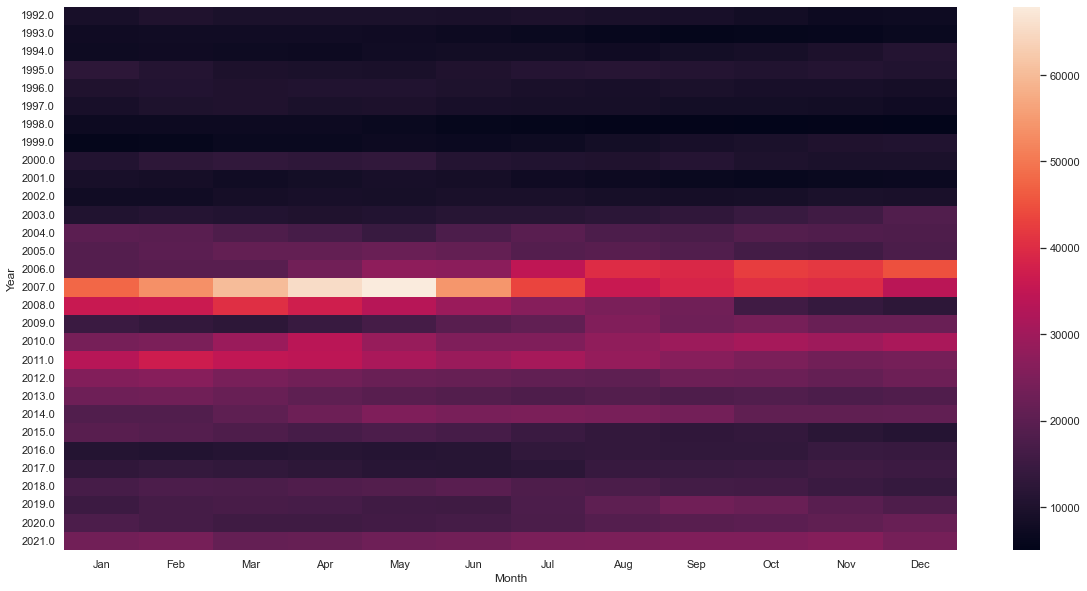

In [250]:
# se genera el heatmap con un tamaño que permite ver el detalle.
plt.figure(figsize=(20,10))
sns.heatmap(tabla_nickel)
plt.show()

El nickel parece haber sido afectado por una circunstancia similar al aluminio en el año 2006, con un poco de delay, alcanzando su máximo histórico en 2007 y luego volviendo a los valores previos para terminar estabilizándose en un valor más alto. No se ve estacionalidad a lo largo de los meses.

In [251]:
# se genera una variable que guarda un nuevo DataFrame que permite aportar claridad y ser utilizado para realizar distintas gráficas.
tabla_plata=pd.crosstab(df['Year'],df['Month'],values=df['Price_silver_infl'],aggfunc='mean').reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# como los valores de Enero 1992 y Diciembre 2021 no están disponibles, se utiliza la media del año correspondiente.
tabla_plata.iloc[0][0]=tabla_plata.iloc[0].mean()
tabla_plata.iloc[-1][-1]=tabla_plata.iloc[-1].mean()
tabla_plata

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1992.0,5.115292,5.400395,5.348343,5.270265,5.296291,5.283278,5.166161,4.957953,4.905901,4.879875,4.905901,4.853849
1993.0,4.788784,4.762758,4.749745,5.140135,5.803798,5.699694,6.532526,6.298292,5.491486,5.647642,5.894889,6.467461
1994.0,6.701695,6.831825,7.079072,6.961955,7.053046,7.014007,6.870864,6.766760,7.183176,7.092085,6.753747,6.220214
1995.0,6.207201,6.142136,6.051045,7.131124,7.235228,6.974968,6.714708,7.027020,7.066059,6.987981,6.922916,6.740734
1996.0,7.105098,7.365358,7.183176,7.053046,6.987981,6.714708,6.597591,6.688682,6.558552,6.415409,6.285279,6.285279
1997.0,6.207201,6.597591,6.766760,6.207201,6.181175,6.194188,5.686681,5.855850,6.155149,6.545539,6.610604,7.599592
1998.0,7.664657,8.861853,8.120112,8.250242,7.261254,6.844838,7.105098,6.740734,6.506500,6.519513,6.467461,6.350344
1999.0,6.688682,7.196189,6.753747,6.584578,6.844838,6.545539,6.740734,6.844838,6.779773,7.040033,6.701695,6.714708
2000.0,6.753747,6.831825,6.584578,6.584578,6.480474,6.506500,6.467461,6.363357,6.363357,6.285279,6.090084,6.038032


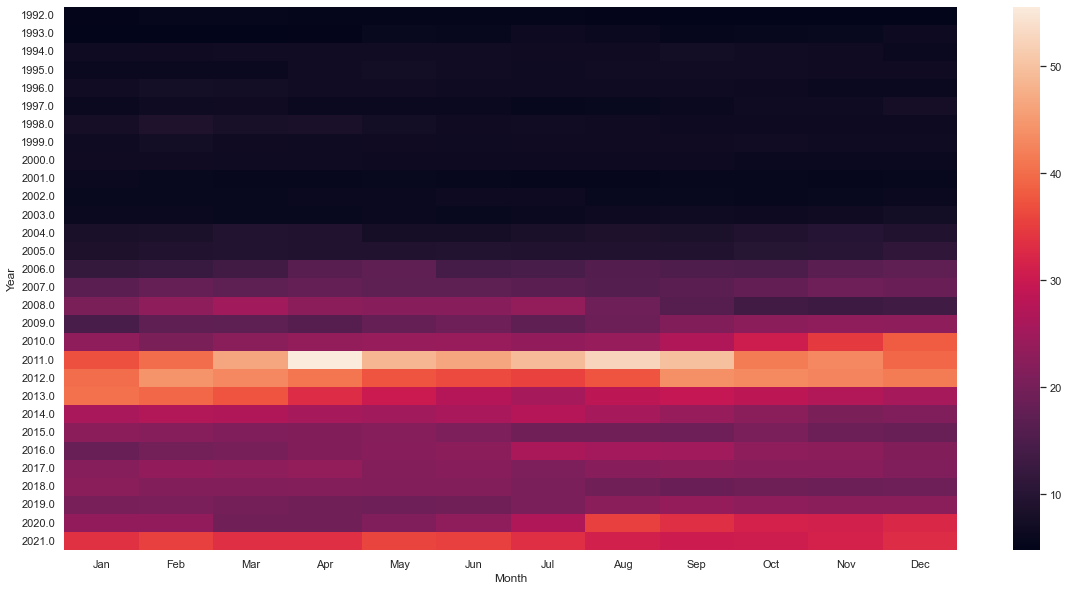

In [252]:
# se genera el heatmap con un tamaño que permite ver el detalle.
plt.figure(figsize=(20,10))
sns.heatmap(tabla_plata)
plt.show()

El valor de la plata, al igual que el oro, y allí puede verse la correlación, parece tener una tendencia creciente definida a lo largo del tiempo. No se percibe estacionalidad dentro del año. 

In [253]:
# se genera una variable que guarda un nuevo DataFrame que permite aportar claridad y ser utilizado para realizar distintas gráficas.
tabla_uranio=pd.crosstab(df['Year'],df['Month'],values=df['Price_uran_infl'],aggfunc='mean').reindex(columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# como los valores de Enero 1992 y Diciembre 2021 no están disponibles, se utiliza la media del año correspondiente.
tabla_uranio.iloc[0][0]=tabla_uranio.iloc[0].mean()
tabla_uranio.iloc[-1][-1]=tabla_uranio.iloc[-1].mean()
tabla_uranio

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1992.0,11.120200,10.280270,10.085075,10.085075,9.824815,10.085075,10.085075,10.475465,11.386375,13.338325,13.663650,13.013000
1993.0,12.752740,13.143130,13.273260,13.468455,13.143130,13.403390,12.882870,13.078065,13.273260,13.247234,12.882870,12.817805
1994.0,12.297285,12.297285,12.102090,12.037025,12.037025,12.037025,11.841830,11.776765,12.297285,12.362350,12.492480,13.533520
1995.0,14.028014,14.509495,15.355340,15.420405,15.485470,15.225210,15.225210,15.225210,15.420405,15.420405,15.420405,15.420405
1996.0,15.875860,20.495475,20.495475,20.807787,21.315294,21.471450,21.471450,21.419398,21.015995,20.482462,19.610591,19.207188
1997.0,18.855837,17.970953,17.723706,16.695679,15.394379,14.236222,13.650637,13.520507,13.338325,14.678664,16.591575,16.266250
1998.0,15.667652,14.808794,13.871858,13.988975,13.988975,13.988975,13.806793,13.663650,13.312299,12.505493,11.555544,11.048037
1999.0,11.724713,11.971960,13.585572,14.119105,13.962949,13.741728,13.351338,13.156143,12.908896,12.700688,12.635623,12.544532
2000.0,12.427415,12.219207,12.115103,11.893882,11.061050,10.709699,10.540530,10.358348,9.850841,9.629620,9.278269,9.291282


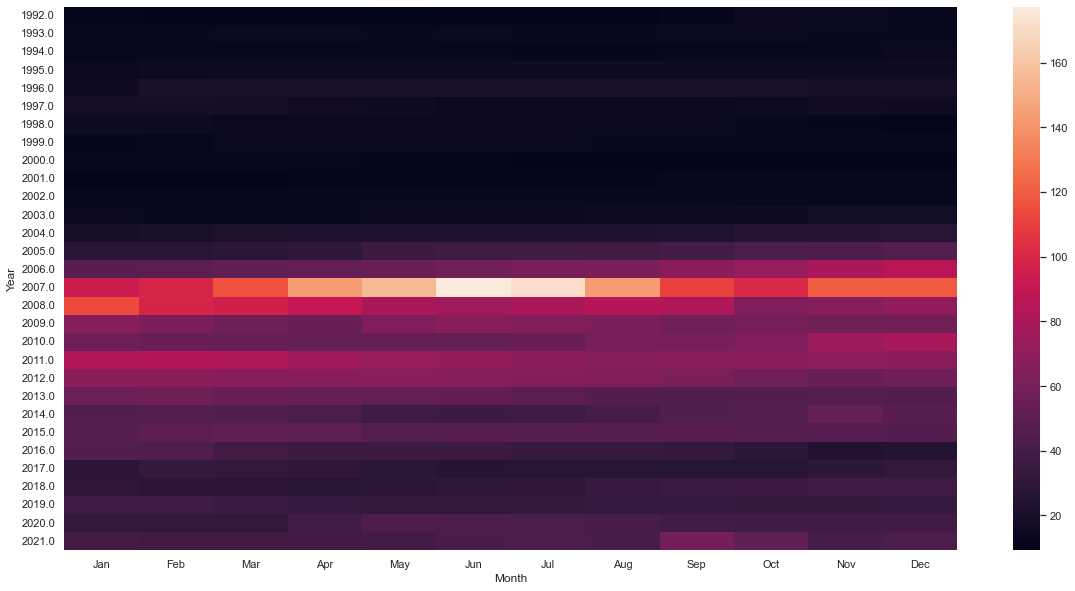

In [254]:
# se genera el heatmap con un tamaño que permite ver el detalle.
plt.figure(figsize=(20,10))
sns.heatmap(tabla_uranio)
plt.show()

El comportamiento del uranio es muy similar al del nickel. Cabería un análisis similar.

Resumiendo: Se analiza el comportamiento de commodities por lo que las variaciones son altas en los precios. Sin embargo, se puede decir que el oro y la plata parecen tener valores más estables en relación al resto. Si se observa el gráfico del oro,podría pensarse: es posible que existiese una estacionalidad no en meses sino en años? Por ejemplo, ciclos de 10 años donde los valores son más altos o más bajos. Estos ciclos podrían estar asociados a expansiones económicas a nivel global o contracciones de la economía en el caso de las bajas. Los metales analizados son commodities cuyo valor depende fundamentalmente del requerimiento de la industria rigiéndose básicamente por la oferta y la demanda.

# Algoritmos de Clasificación 

En la presente sección se utilizan distintos algoritmos de clasificacion. Se utilizan algoritmos supervisados pero se hace una prueba de un no supervisado como K-means para establecer valores de referencia. Con ellos se pretende conseguir que ante un valor de cada uno de los metales, el algoritmo, clasifique entre valor 'alto','medio' o 'bajo'. Para la utilización de los algoritmos supervisados, se crea un nuevo DataFrame con una nueva variable llamada Rango (una para cada metal) y se le asigna el valor que debe tomar para cada precio. Como se explica más abajo, en detalle, la variable Rango será de tipo númerica (0,1,2) correspondiéndose con lo antes mencionado. Conocer en qué rango se encuentra el precio del metal es determinante para decidir si es conveniente comprar, vender estos commodities o retener la inversión. Por último se utiliza una regresión múltiple para predecir el valor de los metales.

In [255]:
# se genera un DataFrame de manera de preparar las variables para la aplicación del algoritmo.
df_arbol=pd.DataFrame()
# se crea una función que permite asignar un valor númerico al precio del metal.
def rangos(precio,lim_sup,lim_inf):
    
    '''Esta función toma el precio de la columna correspondiente en el DataFrame,
    también toma el límite superior e inferior para delimitar si un valor es bajo, medio o alto.
    El 0 corresponde a un precio alto, el 1 a un precio medio y el 2 a un precio bajo del metal.
    precio: Serie del DataFrame
    lim_sup: límite superior
    lim_inferior: límite inferior'''
    if precio>lim_sup:
        return 0
    elif precio<lim_inf:
        return 2
    else:
        return 1

# se completa el DataFrame con los precios de cada metal y el rango que corresponde a cada uno.
df_arbol['Precio_aluminio']=df.Price_alum_infl
df_arbol['Rango_alum']=df_arbol.Precio_aluminio.apply(rangos,args=(3500,2000))
df_arbol['Precio_oro']=df.Price_gold_infl
df_arbol['Rango_oro']=df_arbol.Precio_oro.apply(rangos,args=(2000,1000))
df_arbol['Precio_nickel']=df.Price_nickel_infl
df_arbol['Rango_nickel']=df_arbol.Precio_nickel.apply(rangos,args=(55000,35000))
df_arbol['Precio_plata']=df.Price_silver_infl
df_arbol['Rango_plata']=df_arbol.Precio_plata.apply(rangos,args=(40,20))
df_arbol['Precio_uranio']=df.Price_uran_infl
df_arbol['Rango_uranio']=df_arbol.Precio_uranio.apply(rangos,args=(120,60))


In [256]:
# se visualiza el DataFrame
df_arbol

,Precio_aluminio,Rango_alum,Precio_oro,Rango_oro,Precio_nickel,Rango_nickel,Precio_plata,Rango_plata,Precio_uranio,Rango_uranio
0,1648.525879,2,460.543083,2,10230.690470,2,5.400395,2,10.280270,2
1,1666.275611,2,448.089642,2,9652.653010,2,5.348343,2,10.085075,2
2,1713.877165,2,440.646206,2,9656.426780,2,5.270265,2,10.085075,2
3,1700.525827,2,438.850412,2,9534.364840,2,5.296291,2,9.824815,2
4,1659.873215,2,443.496053,2,9359.990640,2,5.283278,2,10.085075,2
5,1708.671965,2,458.994536,2,9757.017270,2,5.166161,2,10.085075,2
6,1698.261565,2,446.423978,2,9457.848400,2,4.957953,2,10.475465,2
7,1652.143493,2,449.508059,2,9001.742750,2,4.905901,2,11.386375,2
8,1527.439914,2,448.141694,2,8205.086890,2,4.879875,2,13.338325,2
9,1508.271765,2,435.961526,2,7241.578344,2,4.905901,2,13.663650,2


Realizamos la evaluación del algoritmo para el caso del aluminio.

## Decision Tree

Se aplica el algoritmo de referencia. Se empieza por el precio del aluminio.

In [257]:
# Se generan las variables X e y. Como el algoritmo debe recibir un array de dos dimensiones se utiliza values y luego reshape.
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
y=df_arbol.Rango_alum.values.reshape(-1,1)
# se divide las variables en un 70% para entrenar y un 30% para evaluar.
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
# se genera el objeto Tree y se lo entrena con las variables de entrenamiento.
Tree=tree.DecisionTreeClassifier(max_depth=2,random_state=1)  
Tree.fit(X_train,y_train)
# se realiza la predicción y se imprime la eficiencia del algoritmo utilizado.
y_pred=Tree.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 0.9907407407407407


Realizamos la evaluación del algoritmo para el caso del oro.

In [258]:
# mismo proceso que el primer caso.
X=df_arbol.Precio_oro.values.reshape(-1,1)
y=df_arbol.Rango_oro.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Tree=tree.DecisionTreeClassifier(max_depth=2,random_state=1)  
Tree.fit(X_train,y_train)
y_pred=Tree.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


Realizamos la evaluación del algoritmo para el caso del nickel.

In [259]:
# mismo proceso que el primer caso.
X=df_arbol.Precio_nickel.values.reshape(-1,1)
y=df_arbol.Rango_nickel.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Tree=tree.DecisionTreeClassifier(max_depth=2,random_state=1)  
Tree.fit(X_train,y_train)
y_pred=Tree.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


Realizamos la evaluación del algoritmo para el caso de la plata.

In [260]:
# mismo proceso que el primer caso.
X=df_arbol.Precio_plata.values.reshape(-1,1)
y=df_arbol.Rango_plata.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Tree=tree.DecisionTreeClassifier(max_depth=2,random_state=1)  
Tree.fit(X_train,y_train)
y_pred=Tree.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


Realizamos la evaluación del algoritmo para el caso del uranio.

In [261]:
# mismo proceso que el primer caso.
X=df_arbol.Precio_uranio.values.reshape(-1,1)
y=df_arbol.Rango_uranio.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Tree=tree.DecisionTreeClassifier(max_depth=2,random_state=1)  
Tree.fit(X_train,y_train)
y_pred=Tree.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


La conclusión de esta sección es que el algoritmo posee una precisión muy alta. Este puede de manera eficiente detectar los límites impuestos previamente. Se entiende que un algoritmo de clasificación no supervisado podría ser mejor para definir los límites y tomar mejores decisiones por ejemplo a la hora de comprar o vender estos commodities.

## Random Forest

En esta sección se aplica el algoritmo Random Forest al mismo DataFrame creado en el punto anterior.

In [262]:
# Se generan las variables X e y. Como el algoritmo debe recibir un array de dos dimensiones se utiliza values y luego reshape.
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
y=df_arbol.Rango_alum.values.reshape(-1,1)
# se divide las variables en un 70% para entrenar y un 30% para evaluar.
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
# se genera el objeto Forest y se lo entrena con las variables de entrenamiento.
Forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
Forest.fit(X_train,y_train)
# se realiza la predicción y se imprime la eficiencia del algoritmo utilizado.
y_pred=Forest.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')


La eficiencia del algoritmo es de 0.9907407407407407


In [263]:
# idem para el oro
X=df_arbol.Precio_oro.values.reshape(-1,1)
y=df_arbol.Rango_oro.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
Forest.fit(X_train,y_train)
y_pred=Forest.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')


La eficiencia del algoritmo es de 1.0


In [264]:
# idem para el nickel
X=df_arbol.Precio_nickel.values.reshape(-1,1)
y=df_arbol.Rango_nickel.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
Forest.fit(X_train,y_train)
y_pred=Forest.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


In [265]:
# idem para la plata
X=df_arbol.Precio_plata.values.reshape(-1,1)
y=df_arbol.Rango_plata.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
Forest.fit(X_train,y_train)
y_pred=Forest.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


In [266]:
# idem para el uranio
X=df_arbol.Precio_uranio.values.reshape(-1,1)
y=df_arbol.Rango_uranio.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
Forest = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
Forest.fit(X_train,y_train)
y_pred=Forest.predict(X_test)
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


La conclusión es que no presenta diferencias significativas con el anterior.

## KNN Neighbors

Se aplica el algoritmo de referencia.

In [267]:
# se generan las variables a utilizar para el algoritmo.
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
y=df_arbol.Rango_alum.values.reshape(-1,1)
# se separa la información en entrenamiento y evaluación.
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
# se genera el objeto indicando 3 vecinos cercanos. Luego, se entrena el mismo.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
# se realiza la predicción de clasificación.
y_res=knn.predict(X_test)
# se imprime la eficiencia del algoritmo.
print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')



La eficiencia del algoritmo es de 0.42592592592592593


In [268]:
# proceso similar al primero.
X=df_arbol.Precio_oro.values.reshape(-1,1)
y=df_arbol.Rango_oro.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_res=knn.predict(X_test)

print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 0.5555555555555556


In [269]:
# proceso similar al primero.
X=df_arbol.Precio_nickel.values.reshape(-1,1)
y=df_arbol.Rango_nickel.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_res=knn.predict(X_test)

print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 0.8055555555555556


In [270]:
# proceso similar al primero.
X=df_arbol.Precio_plata.values.reshape(-1,1)
y=df_arbol.Rango_plata.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_res=knn.predict(X_test)

print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 0.7037037037037037


In [271]:
# proceso similar al primero.
X=df_arbol.Precio_uranio.values.reshape(-1,1)
y=df_arbol.Rango_uranio.values.reshape(-1,1)
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=1)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_res=knn.predict(X_test)

print(f'La eficiencia del algoritmo es de {accuracy_score(y_test,y_pred)}')

La eficiencia del algoritmo es de 1.0


Este algoritmo fue menos preciso a la hora de realizar una correcta clasificación. Por otro lado, los parámetros podrían ajustarse para mejorar su eficiencia.

Resumen de algoritmos supervisados utilizados para la clasificación de rangos de precios.

In [272]:
# se genera DataFrame a los efectos de presentar resultados. Se muestra la eficiencia de cada algoritmo para el caso de cada metal.
resumen=pd.DataFrame({'Metal':['Aluminio','Oro','Nickel','Plata','Uranio'],
                      'Decision Tree':[0.9907,1,1,1,1],
                      'KNN Neighbors':[0.4559,0.5555,0.8055,0.7037,1],
                     'Random Forest':[0.9907,1,1,1,1]}).set_index('Metal')
resumen

,Decision Tree,KNN Neighbors,Random Forest
Metal,,,
Aluminio,0.9907,0.4559,0.9907
Oro,1.0000,0.5555,1.0000
Nickel,1.0000,0.8055,1.0000
Plata,1.0000,0.7037,1.0000
Uranio,1.0000,1.0000,1.0000


## K-Means - No supervisado

Se utiliza para determinar agrupamientos en los precios de los metales.
Primero se utiliza un método para determinar la cantidad de clusters más conveniente. Luego se realiza la prueba del algoritmo con el valor de K encontrado.

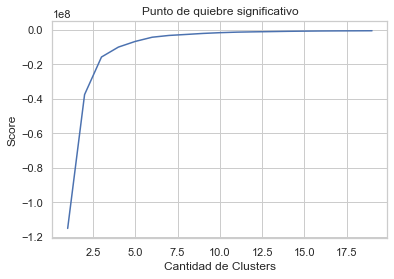

In [273]:
# se generan las variables a utilizar para el algoritmo. Se utiliza de prueba el precio del algoritmo.
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
# se genera un ciclo para calcular el score en un rango de 20, para luego poder graficarlo.
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
# se calcula el score para cada número de cluster. 
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
# se visualiza el score con el objetivo de encontrar un punto de quiebre significativo.
plt.plot(Nc,score)
plt.xlabel('Cantidad de Clusters')
plt.ylabel('Score')
plt.title('Punto de quiebre significativo')
plt.show()

Se puede tomar el valor 3 como punto de quiebre. De hecho, es lo que se necesita para el análisis.

In [274]:
X=df_arbol.Precio_aluminio.values.reshape(-1,1)
y=df_arbol.Rango_alum.values.reshape(-1,1)
# se utiliza el valor de n=3 conseguido.
kmeans = KMeans(n_clusters=3,random_state=15).fit(X)
# se imprime el valor de los centroides.
centroids = kmeans.cluster_centers_
print(centroids)

[[1844.523291  ]
 [2455.47304761]
 [3347.36575054]]


Se utilizan estos centroides para predecir las categorías. Como son 3, estas coincidirán con la la clasificación del rango "Alto, Medio y Bajo'

In [275]:
# se realiza la predicción del algoritmo.
new_labels = kmeans.predict(X)

In [276]:
# se modifica el tipo de dato de las variables anteriores para poder generar el DataFrame.
X_test_cambio=list(X.reshape(358,))
rangos=list(new_labels)
# se visualiza un DataFrame con las categorías asignadas mediante el algoritmo.
pd.DataFrame({'Precios':X_test_cambio,'Rangos':rangos})


,Precios,Rangos
0,1648.525879,0
1,1666.275611,0
2,1713.877165,0
3,1700.525827,0
4,1659.873215,0
5,1708.671965,0
6,1698.261565,0
7,1652.143493,0
8,1527.439914,0
9,1508.271765,0


El algoritmo K-means resulta ser una opción muy intersante para la clasificación del rango.

## Regresión Múltiple

Se realiza una leve modificación en el dataframe original de modo de que los meses tomen un valor numérico que permita utilizar el algoritmo de regresión.

In [277]:
# se reemplaza el mes por su valor numérico correspondiente
df.Month=df.Month.replace(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],[1,2,3,4,5,6,7,8,9,10,11,12])

In [278]:
# se crean las variables que se usarán para el algoritmo. Los features por un lado y luego el target.
X_multiple=df.loc[:,['Year','Month']]
y_multiple=df.loc[:,'Price_alum_infl']
# se separa la información en entrenamiento y evaluación.
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.3,random_state=2)
# se genera el objeto.
lr_multiple = linear_model.LinearRegression()
# se entrena el modelo.
lr_multiple.fit(X_train, y_train)
# se realiza la predicción.
Y_pred_multiple = lr_multiple.predict(X_test)
# se comparten resultados.
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Valor de las pendientes o coeficientes "a":
[30.122137   -2.37533322]
Valor de la intersección o coeficiente "b":
-58117.256634061894
Precisión del modelo:
0.23607121705043055


Probamos el modelo de regresión múltiple para para predecir el precio del oro.

In [279]:
# proceso similar al anterior.
X_multiple=df.loc[:,['Year','Month']]
y_multiple=df.loc[:,'Price_gold_infl']
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.3,random_state=2)
lr_multiple = linear_model.LinearRegression()
lr_multiple.fit(X_train, y_train)
Y_pred_multiple = lr_multiple.predict(X_test)
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Valor de las pendientes o coeficientes "a":
[70.4988112  13.07690417]
Valor de la intersección o coeficiente "b":
-140460.0565587859
Precisión del modelo:
0.8041169237829198


El modelo resulta poco eficiente para el caso del aluminio, pero muy preciso para el caso del oro.